In [46]:
#CIELAB color space, also referred to as L*a*b*, is a color space 
#L* for perceptual lightness and a* and b* for the four unique colors of human vision: red green, blue and yellow.
#going to apply gamma correction to L plane in this color space.

import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

img_orig = cv.imread('(3).jpg', cv.IMREAD_COLOR)
#print(img_orig.shape)


cv.namedWindow("Image", cv.WINDOW_AUTOSIZE)
cv.imshow("Image", img_orig)
cv.waitKey(0)
gamma = 2.2
table = np.array([(i/255.0)**(1/gamma)*255.0 for i in np.arange(0,256)]).astype('uint8')
img_gamma = cv.LUT(img_orig, table)
cv.namedWindow("Gamma Corrected", cv.WINDOW_AUTOSIZE)
cv.imshow("Gamma Corrected", img_gamma)

cv.waitKey(0)
cv.destroyAllWindows()

Try 1

In [44]:

import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

img_orig = cv.imread('(3).jpg', cv.IMREAD_COLOR)
#open the image in L*a*b color space
img_lab = cv.cvtColor(img_orig, cv.COLOR_BGR2LAB)
#apply gamma correction to L plane
#img_lab[:,:,0] = cv.LUT(img_lab[:,:,0], table)

#apply gamma correction to L plane using gamma function
gamma = 0.6
img_lab[:,:,0] = np.power((img_lab[:,:,0]/255.0), (1/gamma))*255.0



#table = np.array([(i/100.0)**(1/gamma)*100.0 for i in np.arange(101)]).astype('float32')


#img_lab[:,:,0] = cv.LUT(img_lab[:,:,0], table)

#convert back to BGR color space
img_bgr = cv.cvtColor(img_lab, cv.COLOR_LAB2BGR)
#display the image
cv.namedWindow("Original", cv.WINDOW_AUTOSIZE)
cv.imshow("Original", img_orig)
cv.imshow("L*a*b*", img_lab)
cv.namedWindow("Gamma Corrected", cv.WINDOW_AUTOSIZE)
cv.imshow("Gamma Corrected", img_bgr)
cv.waitKey(0)
cv.destroyAllWindows()


cv.imwrite('Q3\original.jpg', img_orig)
cv.imwrite('Q3\lab.jpg', img_lab)
cv.imwrite('Q3\gamma_corrected.jpg', img_bgr)


True

Question 3 Starts here

Gamma = 0.6


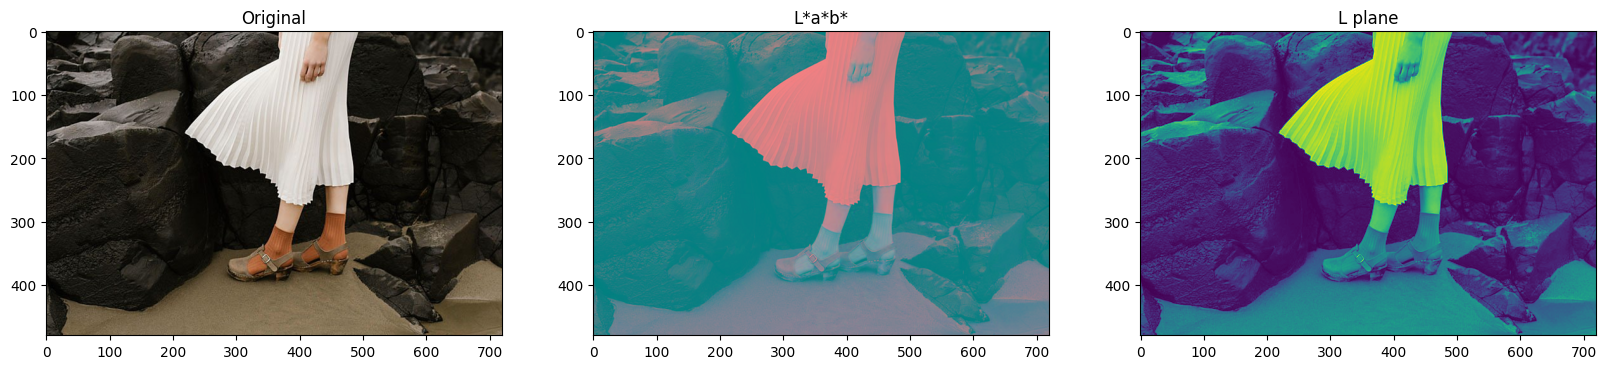

In [47]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

img = cv.imread("(3).jpg",cv.IMREAD_COLOR)
original = cv.cvtColor(img,cv.COLOR_BGR2RGB)
lab = cv.cvtColor(img,cv.COLOR_BGR2LAB)
L, a, b = cv.split(lab)
gamma = 0.6
t = np.array([(p/255.0)**(gamma)*255.0 for p in range (0,256)]).astype('uint8')
print("Gamma =", gamma)

#display
plt.figure(figsize=(20,20))
plt.subplot(1,3,1)
plt.imshow(original)
plt.title("Original")
plt.subplot(1,3,2)
plt.imshow(lab)
plt.title("L*a*b*")
plt.subplot(1,3,3)
plt.imshow(L)
plt.title("L plane")
plt.show()


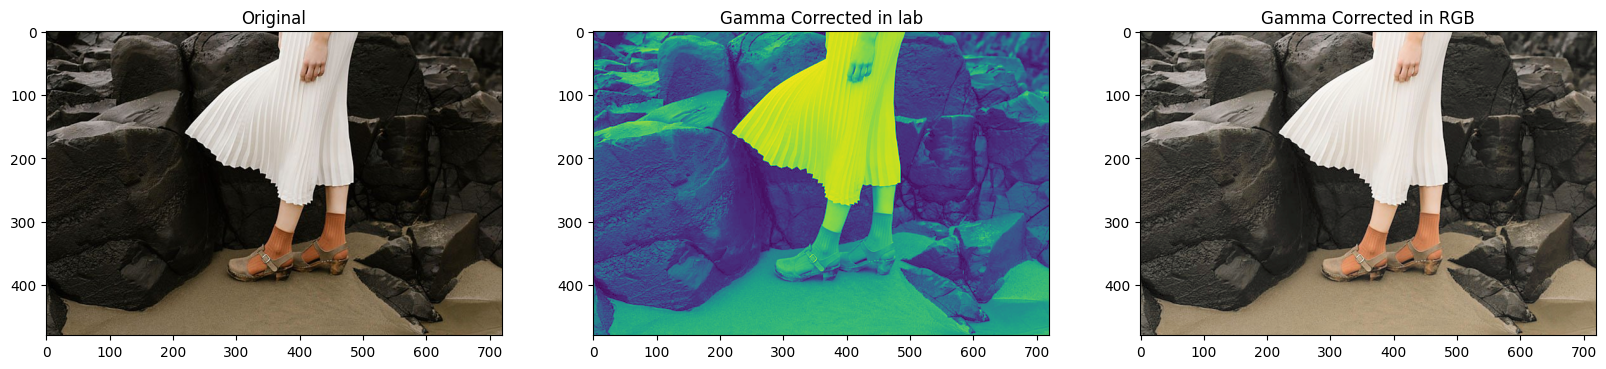

In [48]:
transformed = cv.LUT(L, t)
lab_orig = cv.cvtColor(img,cv.COLOR_BGR2LAB)
lab[:,:,0] = transformed
img = cv.cvtColor(lab, cv.COLOR_Lab2RGB).astype('uint8')
hist_original = cv.calcHist([lab_orig],[0],None,[256],[0,256])
hist_gamma = cv.calcHist([lab],[0],None,[256],[0,256])

#display
plt.figure(figsize=(20,20))
plt.subplot(1,3,1)
plt.imshow(original)
plt.title("Original")
plt.subplot(1,3,2)
plt.imshow(transformed)
plt.title("Gamma Corrected in lab")
plt.subplot(1,3,3)
plt.imshow(img)
plt.title("Gamma Corrected in RGB")
plt.show()


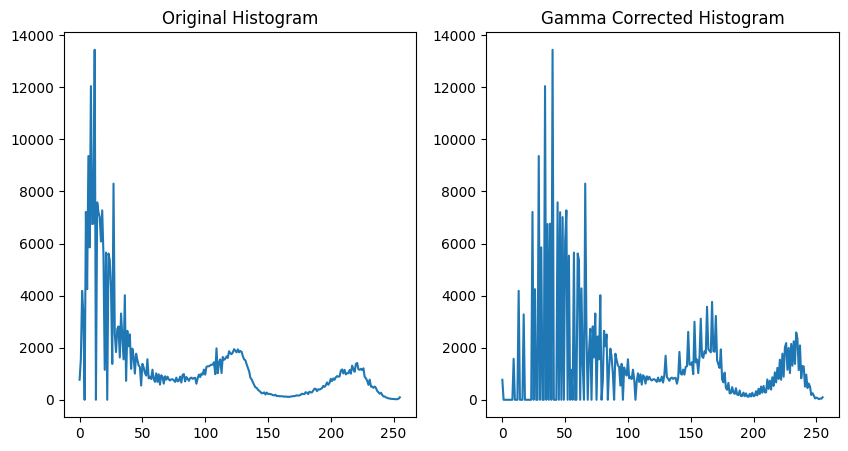

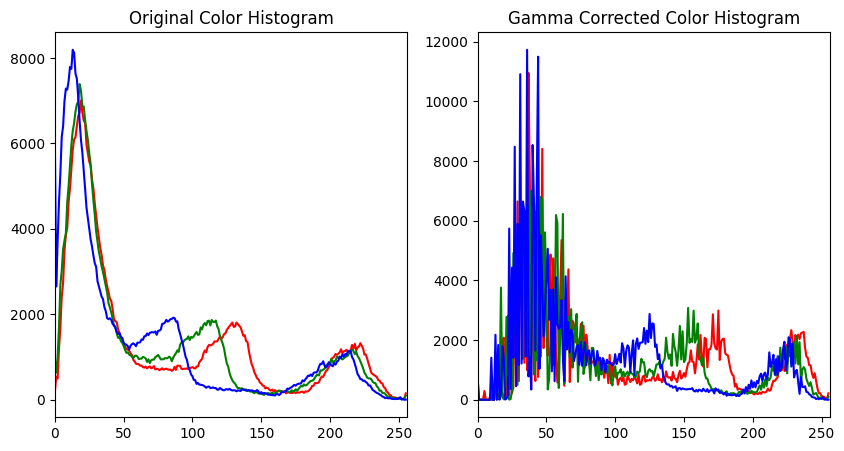

In [49]:
#display 2 histograms
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(hist_original)
plt.title("Original Histogram")
plt.subplot(1,2,2)
plt.plot(hist_gamma)
plt.title("Gamma Corrected Histogram")
plt.show()

#display 2 color histograms
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Original Color Histogram")
colors = ('r','g','b')
for i,col in enumerate(colors):
    histr = cv.calcHist([original],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.subplot(1,2,2)
plt.title("Gamma Corrected Color Histogram")
colors = ('r','g','b')
for i,col in enumerate(colors):
    histr = cv.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

